In [1]:
import csv
import cv2
import numpy as np

In [2]:
lines = []
with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

In [3]:
images = []
measurements = []
for line in lines:
    source_path = line[0]
    filename = source_path.split('/')[-1]
    current_path = './data/IMG/' + filename
    image = cv2.imread(current_path)
    images.append(image)
    measurement  = float(line[3])
    measurements.append(measurement)

In [4]:
X_train = np.array(images)
y_train = np.array(measurements)

In [5]:
# Helper functions
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

def show_images(images, labels, rows=4, cols=5, figsize=(20,10), gray=False):
    images_to_show = len(images)
    fig, axis = plt.subplots(rows, cols, figsize=figsize)
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axis = axis.ravel()
    for i in range(images_to_show):
        image = images[i]
        axis[i].axis('off')
        if (gray):
            axis[i].imshow(image.squeeze(), cmap='gray')
        else:
            axis[i].imshow(image)
        axis[i].set_title(labels[i])

def show_random_image(X,y,rows=4, cols=5, figsize=(20,10),gray=False):
    # show images of random data points
    images_to_show = 4
    images = []
    labels =[]
    for i in range(images_to_show):
        index = random.randint(0, len(X))
        images.append(X[index])
        labels.append(y[index])

    show_images(images,labels,rows,cols,figsize,gray)

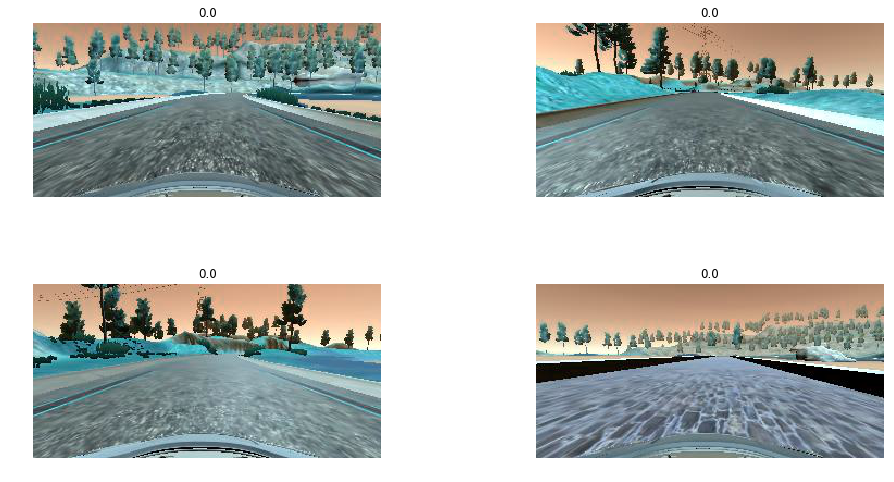

In [6]:
show_random_image(X_train, y_train, 2, 2, (18,8))

In [7]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

Using TensorFlow backend.


## MODEL 1

In [8]:
model = Sequential()
model.add(Flatten(input_shape=(160,320,3)))
model.add(Dense(1))
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
flatten_1 (Flatten)              (None, 153600)        0           flatten_input_1[0][0]            
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 1)             153601      flatten_1[0][0]                  
Total params: 153,601
Trainable params: 153,601
Non-trainable params: 0
____________________________________________________________________________________________________


In [9]:
model.compile(loss='mse', optimizer='adam')
model.fit(X_train,y_train, validation_split=0.2, nb_epoch=10, shuffle=True, verbose=1)

Train on 6428 samples, validate on 1608 samples
Epoch 1/10
6428/6428 [==============================] - 3s - loss: 4746541.6896 - val_loss: 4255.1032
Epoch 2/10
6428/6428 [==============================] - 2s - loss: 3281.9474 - val_loss: 2669.8116
Epoch 3/10
6428/6428 [==============================] - 2s - loss: 2490.0878 - val_loss: 2242.7158
Epoch 4/10
6428/6428 [==============================] - 2s - loss: 2195.7716 - val_loss: 1724.3525
Epoch 5/10
6428/6428 [==============================] - 2s - loss: 2227.2342 - val_loss: 2201.3389
Epoch 6/10
6428/6428 [==============================] - 2s - loss: 4936.7994 - val_loss: 1458.7576
Epoch 7/10
6428/6428 [==============================] - 2s - loss: 6647.8974 - val_loss: 1688.7503
Epoch 8/10
6428/6428 [==============================] - 2s - loss: 243189.6280 - val_loss: 28772.5834
Epoch 9/10
6428/6428 [==============================] - 2s - loss: 291725.3451 - val_loss: 90705.0010
Epoch 10/10
6428/6428 [=============================

In [10]:
model.compile(loss='mse', optimizer='adam')
model.fit(X_train,y_train, validation_split=0.2, nb_epoch=7, shuffle=True, verbose=1)

Train on 6428 samples, validate on 1608 samples
Epoch 1/7
6428/6428 [==============================] - 2s - loss: 5055306.0556 - val_loss: 7735.5262
Epoch 2/7
6428/6428 [==============================] - 2s - loss: 6606.2784 - val_loss: 4495.8975
Epoch 3/7
6428/6428 [==============================] - 2s - loss: 5055.4501 - val_loss: 3709.9386
Epoch 4/7
6428/6428 [==============================] - 2s - loss: 4527.6770 - val_loss: 2810.0405
Epoch 5/7
6428/6428 [==============================] - 2s - loss: 5057.7928 - val_loss: 2759.2275
Epoch 6/7
6428/6428 [==============================] - 2s - loss: 5539.3787 - val_loss: 1884.3231
Epoch 7/7
6428/6428 [==============================] - 2s - loss: 5528.7382 - val_loss: 3049.9090


In [11]:
model.save('model1.h5')

In [12]:
from keras.layers import Lambda

model = Sequential()
#model.add(Flatten(input_shape=(160,320,3)))
model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))
model.add(Flatten())
model.add(Dense(1))
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 160, 320, 3)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
flatten_2 (Flatten)              (None, 153600)        0           lambda_1[0][0]                   
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 1)             153601      flatten_2[0][0]                  
Total params: 153,601
Trainable params: 153,601
Non-trainable params: 0
____________________________________________________________________________________________________


## MODEL 2

In [13]:
model.compile(loss='mse', optimizer='adam')
model.fit(X_train,y_train, validation_split=0.2, nb_epoch=10, shuffle=True, verbose=1)

Train on 6428 samples, validate on 1608 samples
Epoch 1/10
6428/6428 [==============================] - 2s - loss: 1.7458 - val_loss: 1.5015
Epoch 2/10
6428/6428 [==============================] - 2s - loss: 5.1496 - val_loss: 5.5645
Epoch 3/10
6428/6428 [==============================] - 2s - loss: 4.2397 - val_loss: 1.4414
Epoch 4/10
6428/6428 [==============================] - 2s - loss: 2.1499 - val_loss: 1.5979
Epoch 5/10
6428/6428 [==============================] - 2s - loss: 2.3628 - val_loss: 2.1165
Epoch 6/10
6428/6428 [==============================] - 2s - loss: 2.1719 - val_loss: 2.2302
Epoch 7/10
6428/6428 [==============================] - 2s - loss: 2.4398 - val_loss: 3.5641
Epoch 8/10
6428/6428 [==============================] - 2s - loss: 3.9165 - val_loss: 4.2002
Epoch 9/10
6428/6428 [==============================] - 2s - loss: 5.1452 - val_loss: 2.8405
Epoch 10/10
6428/6428 [==============================] - 2s - loss: 3.6008 - val_loss: 1.9232


In [14]:
model.save('model2.h5')

## MODEL 3 - LeNet Architecture

In [15]:
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

model = Sequential()

model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))
model.add(Convolution2D(6, 5, 5, activation='relu', input_shape=(160,320,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(6, 5, 5, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train,y_train, validation_split=0.2, nb_epoch=5, shuffle=True, verbose=1)

Train on 6428 samples, validate on 1608 samples
Epoch 1/5
6428/6428 [==============================] - 5s - loss: 1.8754 - val_loss: 0.0171
Epoch 2/5
6428/6428 [==============================] - 5s - loss: 0.0151 - val_loss: 0.0157
Epoch 3/5
6428/6428 [==============================] - 5s - loss: 0.0114 - val_loss: 0.0112
Epoch 4/5
6428/6428 [==============================] - 5s - loss: 0.0089 - val_loss: 0.0110
Epoch 5/5
6428/6428 [==============================] - 5s - loss: 0.0078 - val_loss: 0.0113


In [16]:
model.save('model3.h5')

## MODEL 4

In [17]:
augmented_images, augmented_measurements = [], []
for image, measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    augmented_images.append(cv2.flip(image,1))
    augmented_measurements.append(measurement*-1.0)

In [18]:
X_train = np.array(augmented_images)
y_train = np.array(augmented_measurements)

In [19]:
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D


model = Sequential()

model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))
model.add(Convolution2D(6, 5, 5, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(6, 5, 5, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train,y_train, validation_split=0.2, nb_epoch=5, shuffle=True, verbose=1)

Train on 12857 samples, validate on 3215 samples
Epoch 1/5
12857/12857 [==============================] - 11s - loss: 2.3076 - val_loss: 0.0132
Epoch 2/5
12857/12857 [==============================] - 10s - loss: 0.0123 - val_loss: 0.0120
Epoch 3/5
12857/12857 [==============================] - 10s - loss: 0.0111 - val_loss: 0.0112
Epoch 4/5
12857/12857 [==============================] - 10s - loss: 0.0103 - val_loss: 0.0109
Epoch 5/5
12857/12857 [==============================] - 10s - loss: 0.0097 - val_loss: 0.0107


In [20]:
model.save('model4.h5')

## MODEL 5

In [21]:
images = []
measurements = []
current_path = './data/IMG/' 
for line in lines:
    steering_center  = float(line[3])
    correction = 0.2 # this is a parameter to tune
    steering_left = steering_center + correction
    steering_right = steering_center - correction
    
    image_center = cv2.imread(current_path+line[0].split('/')[-1])
    image_left = cv2.imread(current_path+line[1].split('/')[-1])
    image_right = cv2.imread(current_path+line[2].split('/')[-1])

    # add images and angles to data set
    images.extend((image_center, image_left, image_right))
    measurements.extend((steering_center, steering_left, steering_right))

In [22]:
augmented_images, augmented_measurements = [], []
for image, measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    augmented_images.append(cv2.flip(image,1))
    augmented_measurements.append(measurement*-1.0)

In [23]:
X_train = np.array(augmented_images)
y_train = np.array(augmented_measurements)

In [24]:
model = Sequential()

model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))
model.add(Convolution2D(6, 5, 5, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(6, 5, 5, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train,y_train, validation_split=0.2, nb_epoch=5, shuffle=True, verbose=1)

Train on 38572 samples, validate on 9644 samples
Epoch 1/5
38572/38572 [==============================] - 32s - loss: 0.1481 - val_loss: 0.0124
Epoch 2/5
38572/38572 [==============================] - 31s - loss: 0.0097 - val_loss: 0.0127
Epoch 3/5
38572/38572 [==============================] - 31s - loss: 0.0085 - val_loss: 0.0136
Epoch 4/5
38572/38572 [==============================] - 31s - loss: 0.0077 - val_loss: 0.0130
Epoch 5/5
38572/38572 [==============================] - 32s - loss: 0.0071 - val_loss: 0.0136


In [25]:
model.save('model5.h5')

## MODEL 6

#### This model will crop the input images

In [26]:
from keras.layers import Cropping2D

model = Sequential()

model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((70,25), (0,0))))
model.add(Convolution2D(6, 5, 5, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(6, 5, 5, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train,y_train, validation_split=0.2, nb_epoch=5, shuffle=True, verbose=1)

Train on 38572 samples, validate on 9644 samples
Epoch 1/5
38572/38572 [==============================] - 21s - loss: 0.0411 - val_loss: 0.0183
Epoch 2/5
38572/38572 [==============================] - 21s - loss: 0.0163 - val_loss: 0.0188
Epoch 3/5
38572/38572 [==============================] - 21s - loss: 0.0152 - val_loss: 0.0182
Epoch 4/5
38572/38572 [==============================] - 21s - loss: 0.0146 - val_loss: 0.0181
Epoch 5/5
38572/38572 [==============================] - 21s - loss: 0.0143 - val_loss: 0.0185


In [27]:
model.save('model6.h5')


## MODEL 7

In [28]:
from keras.layers import Dropout

model = Sequential()

model.add( Cropping2D( cropping=( (70,25), (0,0) ), input_shape=(160,320,3)))
#Normalize the data.
model.add( Lambda( lambda x: x/255. - 0.5 ) )
# Nvidia Network
# Convolution Layers
model.add( Convolution2D( 24, 5, 5, subsample=(2,2), activation = 'relu' ) )
model.add( Convolution2D( 36, 5, 5, subsample=(2,2), activation = 'relu' ) )
model.add( Convolution2D( 48, 5, 5, subsample=(2,2), activation = 'relu' ) )
model.add( Convolution2D( 64, 3, 3, subsample=(1,1), activation = 'relu' ) )
model.add( Convolution2D( 64, 3, 3, subsample=(1,1), activation = 'relu' ) )
# Flatten for transition to fully connected layers.
model.add( Flatten() )
# Fully connected layers
model.add( Dense( 100 ) )
model.add(Dropout(0.5)) # I added this dropout layer myself, because the previous 
                        # fully connected layers has a lot of free parameters 
                        # and seems like the layer most in danger of overfitting. 
model.add( Dense( 50 ) )
model.add( Dense( 10 ) )
model.add( Dense( 1 ) )

model.compile(loss='mse', optimizer='adam')
model.fit(X_train,y_train, validation_split=0.2, nb_epoch=10, shuffle=True, verbose=1)

Train on 38572 samples, validate on 9644 samples
Epoch 1/10
38572/38572 [==============================] - 23s - loss: 0.0181 - val_loss: 0.0183
Epoch 2/10
38572/38572 [==============================] - 23s - loss: 0.0153 - val_loss: 0.0184
Epoch 3/10
38572/38572 [==============================] - 23s - loss: 0.0141 - val_loss: 0.0214
Epoch 4/10
38572/38572 [==============================] - 23s - loss: 0.0131 - val_loss: 0.0192
Epoch 5/10
38572/38572 [==============================] - 23s - loss: 0.0123 - val_loss: 0.0195
Epoch 6/10
38572/38572 [==============================] - 23s - loss: 0.0118 - val_loss: 0.0205
Epoch 7/10
38572/38572 [==============================] - 23s - loss: 0.0111 - val_loss: 0.0207
Epoch 8/10
38572/38572 [==============================] - 23s - loss: 0.0103 - val_loss: 0.0185
Epoch 9/10
38572/38572 [==============================] - 23s - loss: 0.0097 - val_loss: 0.0214
Epoch 10/10
38572/38572 [==============================] - 23s - loss: 0.0092 - val_los

In [29]:
model.save('model7.h5')